# Visualización de datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mountains_vs_beaches_clean.csv")

In [4]:
df.head()

,Age,Gender,Income,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,5,sunbathing,516,suburban,23,151,winter,1,1,0


In [5]:
numerical_columns = [col for col in df.columns if df[col].dtype != "O"]
correlation_matrix = df[numerical_columns].corr()
correlation_matrix

,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference
Age,1.000000,-0.000005,0.004428,0.002223,0.006305,0.002821,0.010091,0.002251,0.000990
Income,-0.000005,1.000000,-0.000378,-0.000731,-0.005125,0.000956,0.003554,-0.007597,-0.002998
Travel_Frequency,0.004428,-0.000378,1.000000,0.003593,0.007187,-0.003404,0.003719,0.003031,-0.001680
Vacation_Budget,0.002223,-0.000731,0.003593,1.000000,0.001844,-0.000507,-0.000671,-0.008774,-0.004754
Proximity_to_Mountains,0.006305,-0.005125,0.007187,0.001844,1.000000,-0.000736,-0.000994,0.002909,-0.335373
Proximity_to_Beaches,0.002821,0.000956,-0.003404,-0.000507,-0.000736,1.000000,-0.005369,-0.001777,0.334848
Pets,0.010091,0.003554,0.003719,-0.000671,-0.000994,-0.005369,1.000000,0.000044,-0.011375
Environmental_Concerns,0.002251,-0.007597,0.003031,-0.008774,0.002909,-0.001777,0.000044,1.000000,0.001457
Preference,0.000990,-0.002998,-0.001680,-0.004754,-0.335373,0.334848,-0.011375,0.001457,1.000000


<Axes: >

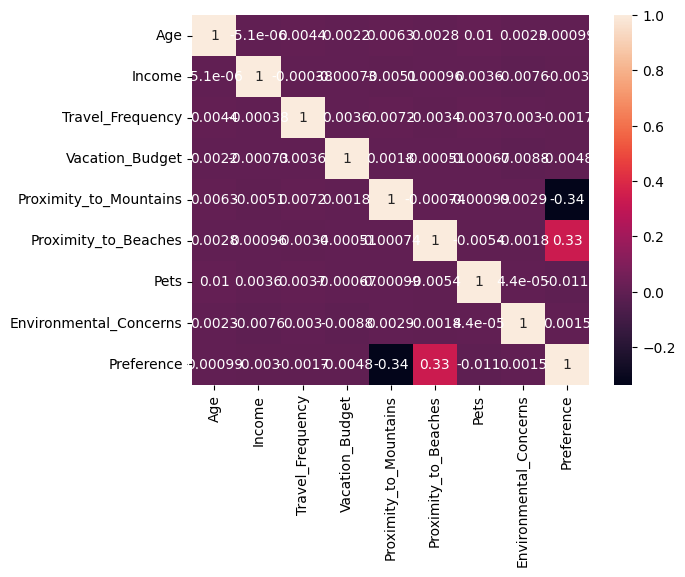

In [6]:
sns.heatmap(correlation_matrix, annot=True)

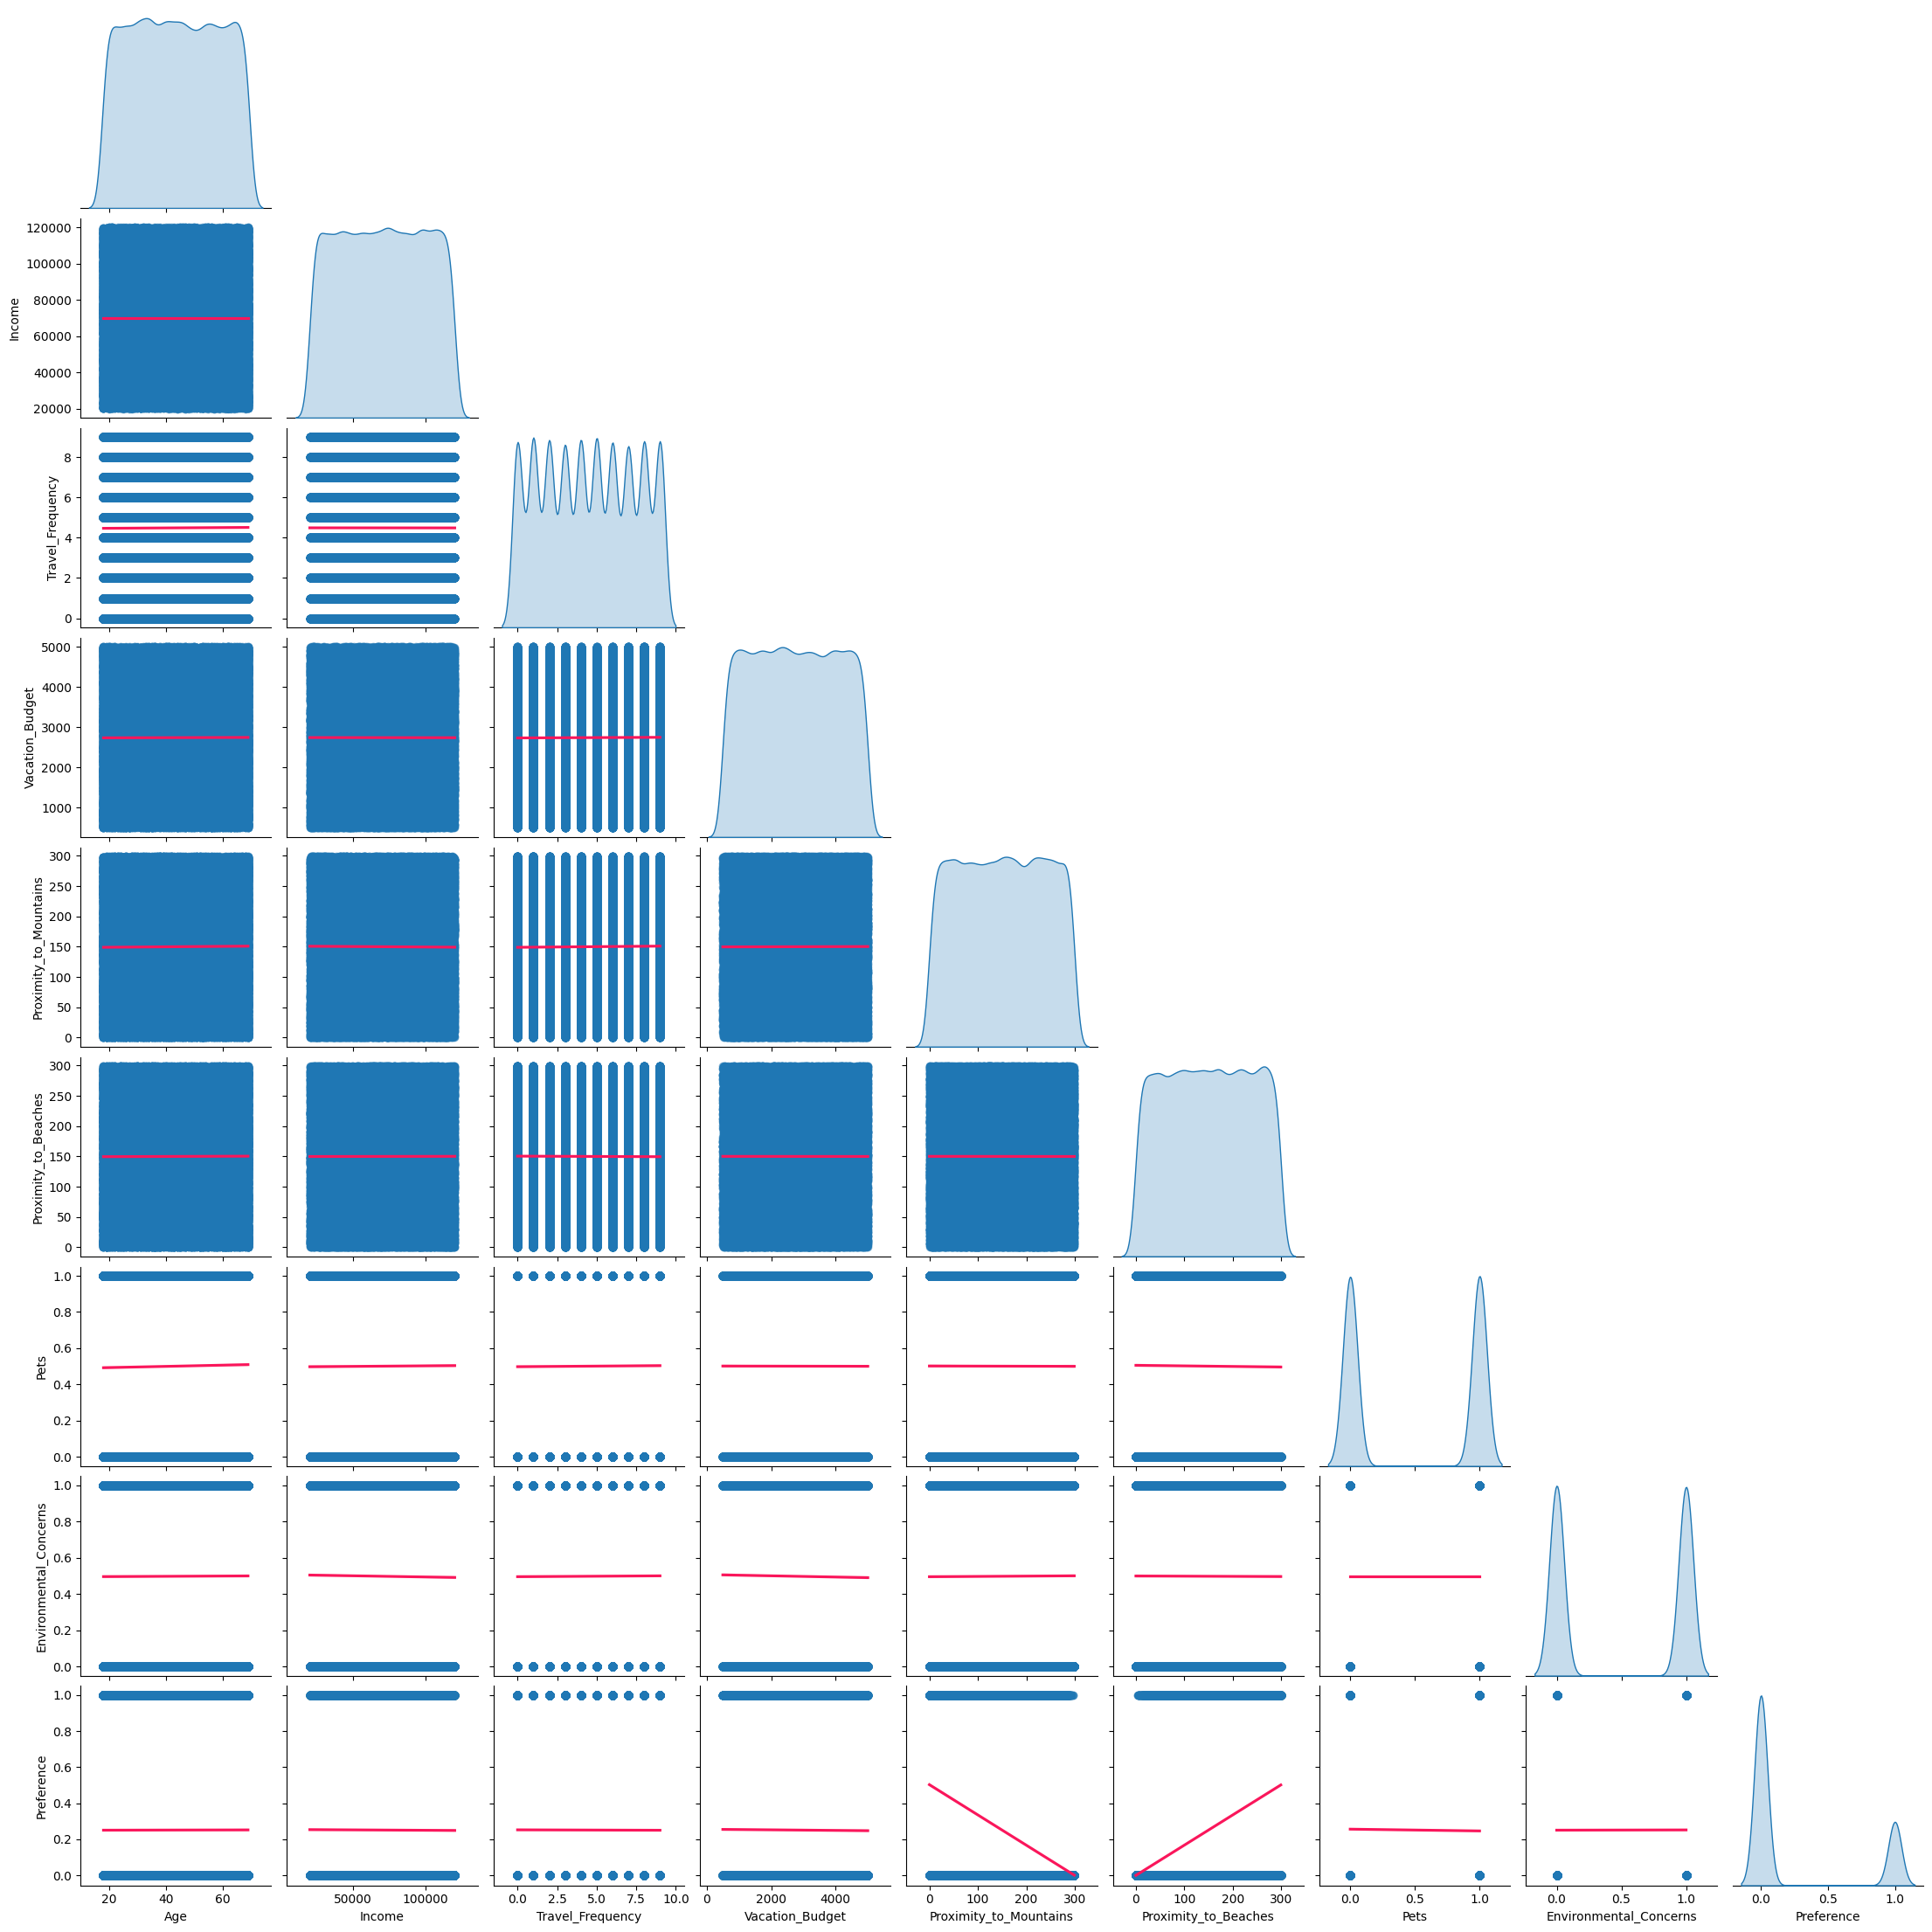

In [7]:
sns.pairplot(df[numerical_columns], 
             diag_kind="kde",
             kind="reg",
             corner=True,
             plot_kws={
                 "line_kws": {
                     "color": "#fa165b"
                     },
                 "scatter_kws": {
                     "alpha": 0.5
                 }
                 }
             )

<Axes: xlabel='Preferred_Activities'>

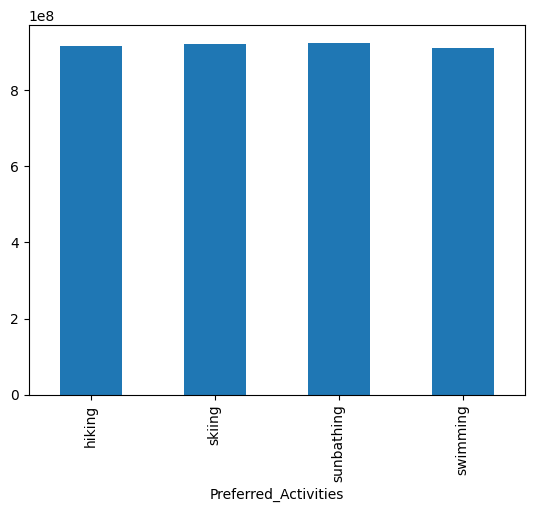

In [10]:
df.groupby("Preferred_Activities")["Income"].sum().plot.bar()

In [8]:
df.groupby(["Preferred_Activities", "Favorite_Season"])[["Income", "Vacation_Budget"]].mean()

Income  Vacation_Budget
Preferred_Activities Favorite_Season                               
hiking               fall             69880.976022      2727.210882
                     spring           69680.609972      2758.033649
                     summer           70393.204848      2756.751212
                     winter           69677.196341      2738.535976
skiing               fall             70567.731330      2717.159476
                     spring           70175.102462      2712.177231
                     summer           69306.159712      2744.993395
                     winter           69757.263256      2738.513798
sunbathing           fall             69731.813446      2754.517262
                     spring           69449.372707      2709.461921
                     summer           70295.021015      2741.836085
                     winter           70295.500445      2794.974785
swimming             fall             70388.731100      2806.529809
                     spring           70088.444963      2715.594527
                     summer           70350.041006      2725.164921
                     winter           70214.528158      2724.825962